# HDB resale prices in Singapore
A hands-on session on predicting resale prices of HDB flats in Singapore. This notebook is part of a series of educational series on data science.

In this hands-on we will be predicting the resale prices of HDB flats in Singapore. The source of the data can be found  [here](https://data.gov.sg/dataset/resale-flat-prices). We will be working with the data from Jan 2015 onwards. To run this notebook you need the following packages:
```
* pandas
* matplotlib
* numpy
* seaborn
* sklearn
* category_encoders
* dateutil
```

## Data exploration

Let's start with loading and exploring the data...

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

from dateutil.relativedelta import relativedelta

In [3]:
file_path = "data/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv"
hdb_resale_prices_df = pd.read_csv(file_path)

In [4]:
hdb_resale_prices_df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
5,2015-01,ANG MO KIO,3 ROOM,603,ANG MO KIO AVE 5,07 TO 09,67.0,New Generation,1980,64,290000.0
6,2015-01,ANG MO KIO,3 ROOM,709,ANG MO KIO AVE 8,01 TO 03,68.0,New Generation,1980,64,290000.0
7,2015-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,65,293000.0
8,2015-01,ANG MO KIO,3 ROOM,109,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,62,300000.0
9,2015-01,ANG MO KIO,3 ROOM,564,ANG MO KIO AVE 3,13 TO 15,68.0,New Generation,1985,69,307500.0


In [5]:
hdb_resale_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79100 entries, 0 to 79099
Data columns (total 11 columns):
month                  79100 non-null object
town                   79100 non-null object
flat_type              79100 non-null object
block                  79100 non-null object
street_name            79100 non-null object
storey_range           79100 non-null object
floor_area_sqm         79100 non-null float64
flat_model             79100 non-null object
lease_commence_date    79100 non-null int64
remaining_lease        79100 non-null int64
resale_price           79100 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 6.6+ MB


We have 79,100 entries and no missing data. Furthermore, we have 4 numerical columns (i.e. `resale_price`, `floor_area_sqm`, `lease_commence_data` and `remaining_lease` and all our other columns are String or date values. One of the numerial values is the resale_price, which is our target variable and the other 2 whilst numerical, are actual temporal. 

In [7]:
hdb_resale_prices_df.describe()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
count,79100.000000,79100.000000,79100.000000,7.910000e+04
mean,97.589028,1992.092554,74.031075,4.397935e+05
std,24.222762,11.547192,11.517000,1.456448e+05
min,31.000000,1966.000000,47.000000,1.600000e+05
25%,76.000000,1984.000000,66.000000,3.380000e+05
50%,96.000000,1992.000000,73.000000,4.088880e+05
75%,112.000000,2001.000000,83.000000,5.050000e+05
max,280.000000,2016.000000,97.000000,1.185000e+06


This summary table shows us some statistics on our numerical columns. 

Alright now we have a basic idea of how our data let's plot some graphs. Perhaps an interesting one is to see how the resale value of our HDB flat developers over time. Can we identify a trend ?

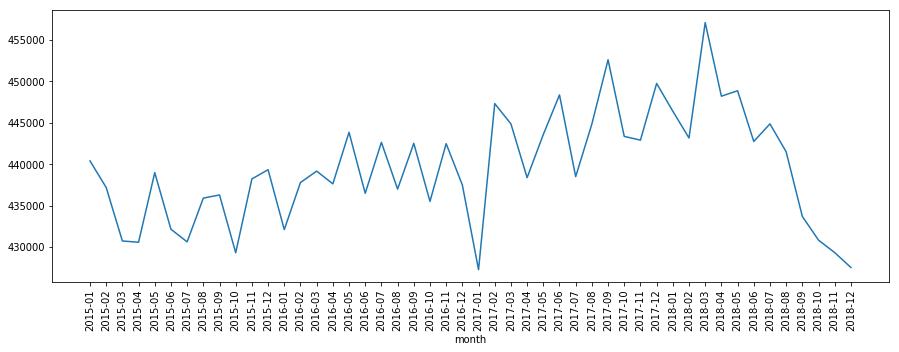

In [9]:
grouped_by_month = hdb_resale_prices_df.groupby(["month"]).mean()["resale_price"]
fig, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation=90)
sns.lineplot(x=grouped_by_month.index, y=grouped_by_month.values, ax=ax)
plt.show()

Hard to say is it? On the overall there seems to be a slow rising trend from 2015-01 to 2018-04 with a steep decline there onwards. Furthermore, on the overall the pattern is very jagged so from this data alone it is hard to identify a trend. (Perhaps it is worth including the other datasets and see if we then can identify a trend, I'll leave this up to you)

In [10]:
# The following functions plot different sorts of charts. Feel free to add your own!

def plot_bar_chart_for_column(col):
    """
    This function plots a bar chart for a categorical feature.
    :param col: String the column name to plot a bar chart for
    """
    count = hdb_resale_prices_df[col].value_counts()
    print("# of categories", len(count))
    fig, ax = plt.subplots(figsize=(15, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=count.index, y=count.values, ax=ax)
    plt.show()
    
    
def plot_hist_chart_for_column(col, **kwargs):
    """
    This function plots a distribution for a continuous feature.
    :param col: String the column name to plot a bar chart for
    :param bins: integer number of bins
    """
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.distplot(hdb_resale_prices_df[col], ax=ax, **kwargs)
    plt.show()
    

def plot_scatter_chart(x_col, y_col, **kwargs):
    """
    This function plots a scatter chart of the provided columns
    :param x_col: the column for the x-axis 
    :param y_col: the column for the y-axis
    """
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.regplot(hdb_resale_prices_df[x_col], hdb_resale_prices_df[y_col], ax=ax,**kwargs)
    plt.show()
    

def plot_box_plot(x_col, y_col, **kwargs):
    """
    This function plots a box plot of the provided columns
    :param x_col: the column for the x-axis 
    :param y_col: the column for the y-axis
    """
    fig, ax = plt.subplots(figsize=(15, 5))
    plt.xticks(rotation=90)
    sns.boxplot(hdb_resale_prices_df[x_col], hdb_resale_prices_df[y_col], ax=ax,**kwargs)
    plt.show()

Following is a series of charts to explore and gain insight to our dataset

C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


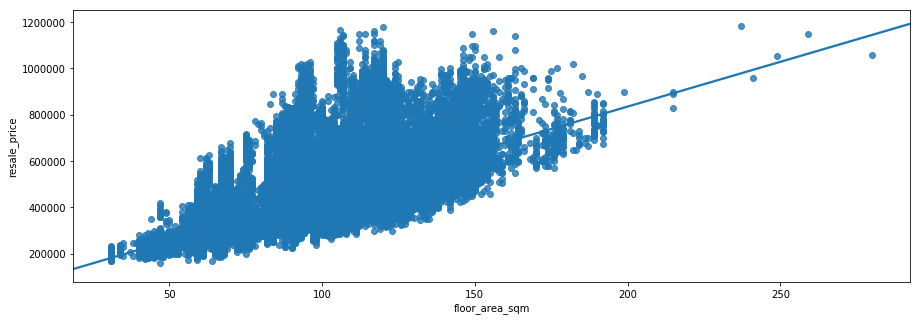

In [11]:
plot_scatter_chart("floor_area_sqm", "resale_price")

C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


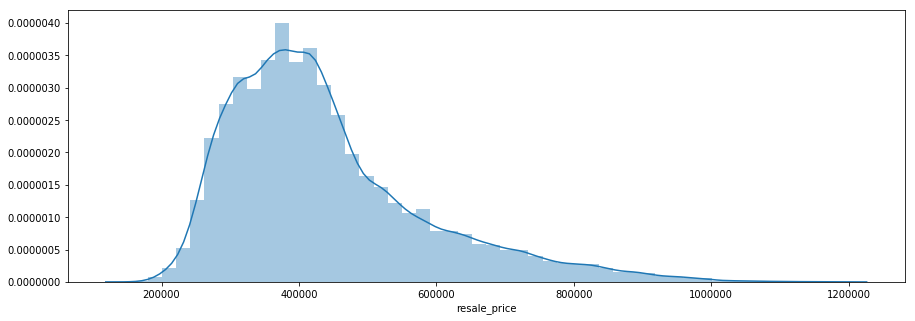

In [12]:
plot_hist_chart_for_column("resale_price")
# Tip #1: to see count pass kde=False as an argument to the function: plot_hist_chart_for_column("resale_price, kde=False")
# Tip #2: play around with bin values bins=<NUMBER_OF_BINS>: plot_hist_chart_for_column("resale_price, bins=5)

What can we observe from the charts above ?

# of categories 7


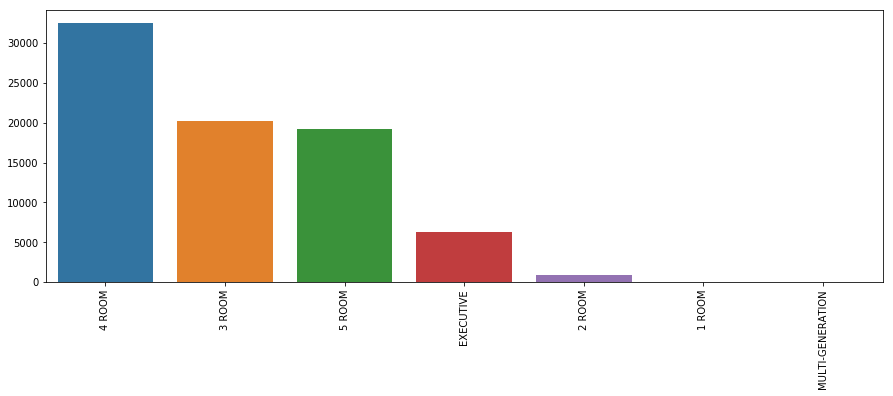

In [13]:
plot_bar_chart_for_column("flat_type")

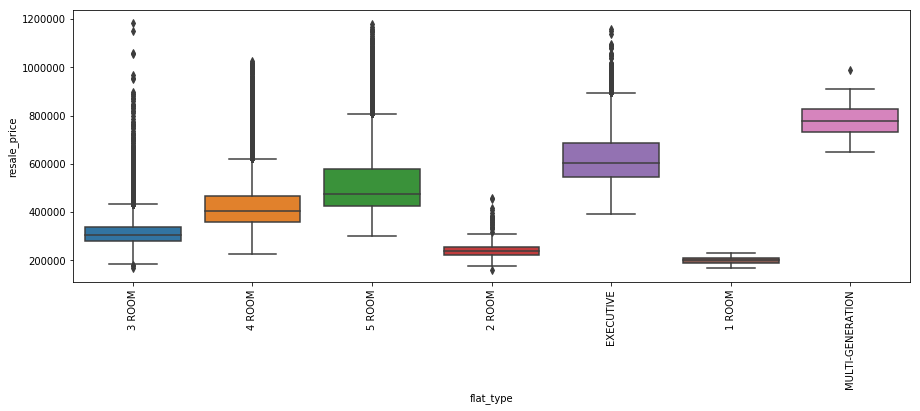

In [14]:
plot_box_plot("flat_type", "resale_price")

# of categories 26


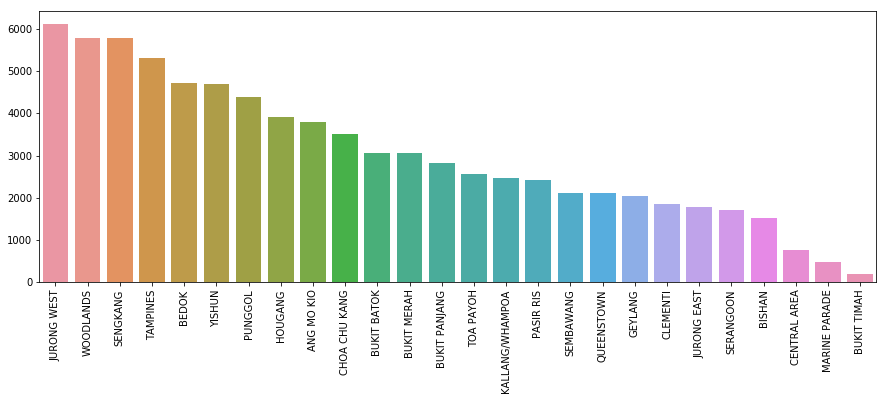

In [15]:
plot_bar_chart_for_column("town")

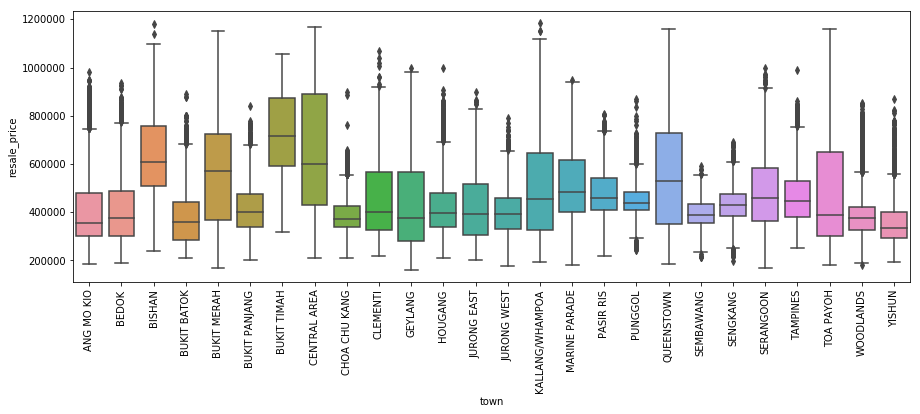

In [16]:
plot_box_plot("town", "resale_price")

# of categories 21


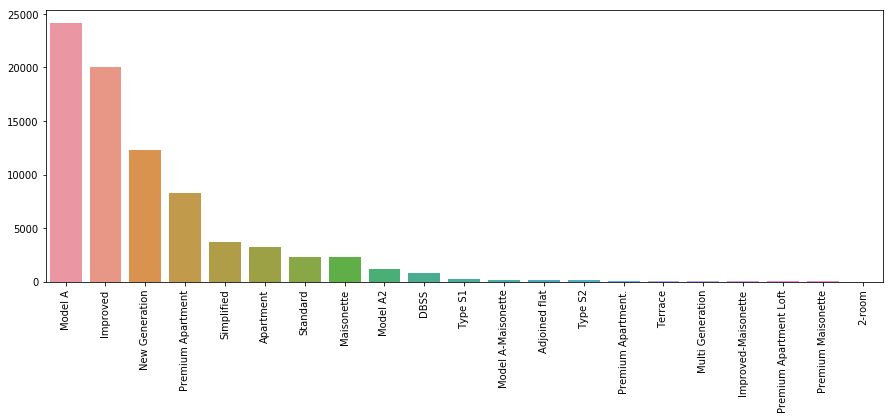

In [17]:
plot_bar_chart_for_column("flat_model")

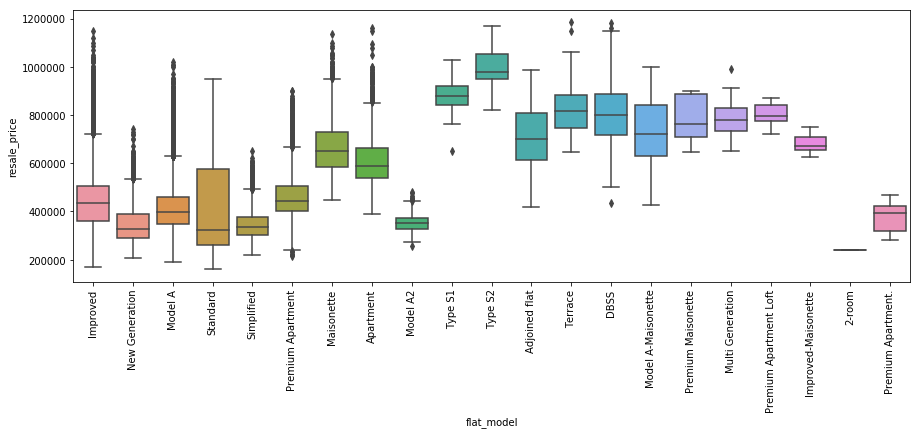

In [18]:
plot_box_plot("flat_model", "resale_price")

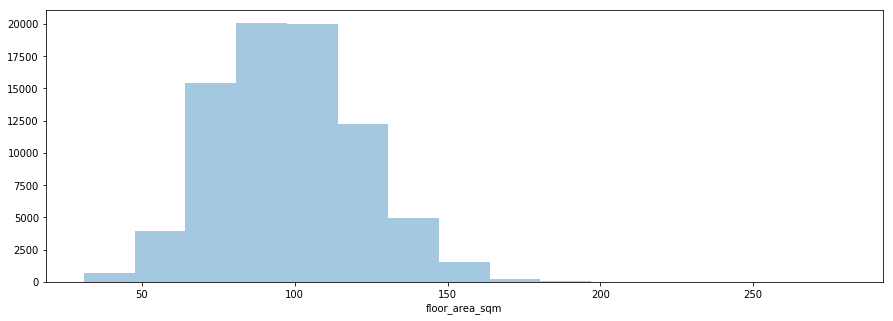

In [22]:
plot_hist_chart_for_column("floor_area_sqm", bins=15, kde=False)

# of categories 17


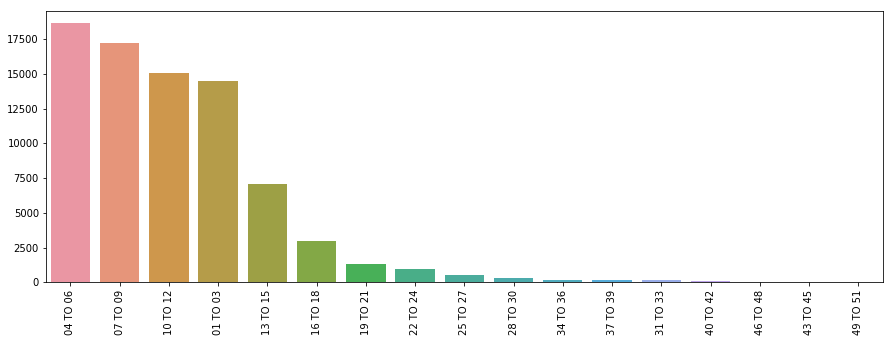

In [23]:
plot_bar_chart_for_column("storey_range")

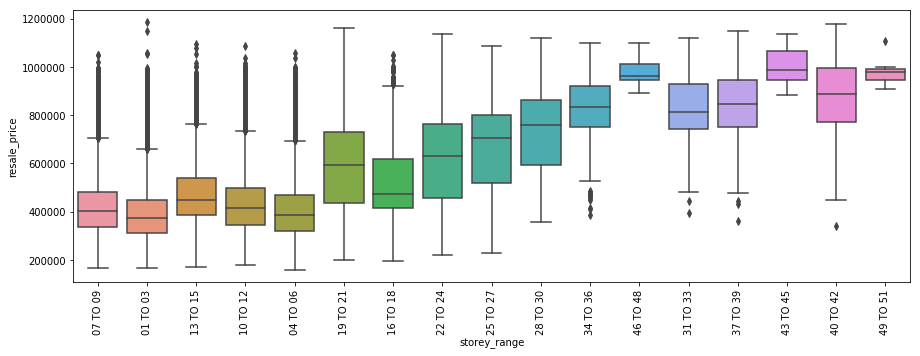

In [24]:
plot_box_plot("storey_range", "resale_price")

# of categories 51


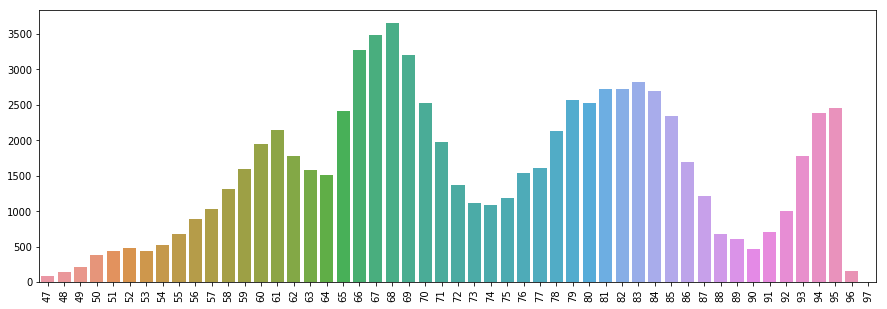

In [25]:
plot_bar_chart_for_column("remaining_lease")

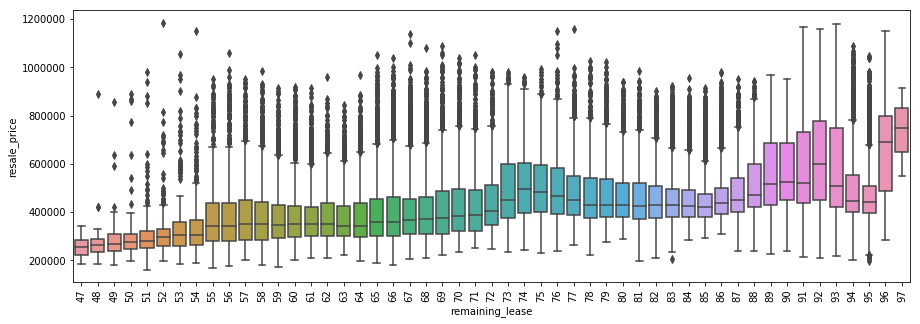

In [26]:
plot_box_plot("remaining_lease", "resale_price")

# of categories 51


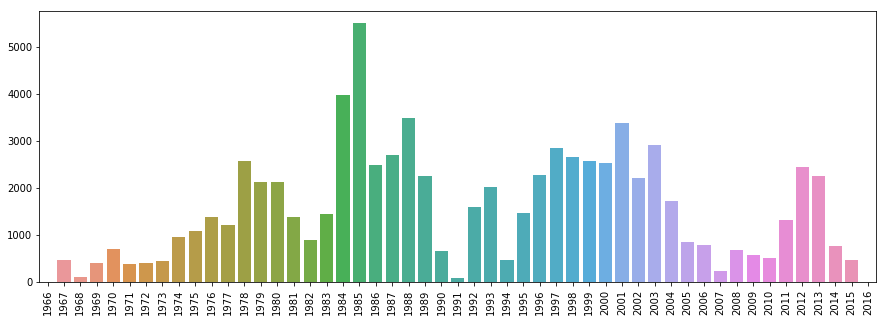

In [27]:
plot_bar_chart_for_column("lease_commence_date")

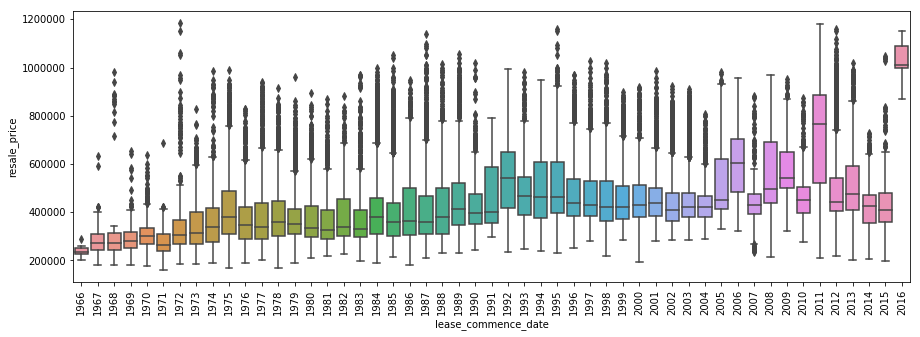

In [28]:
plot_box_plot("lease_commence_date", "resale_price")

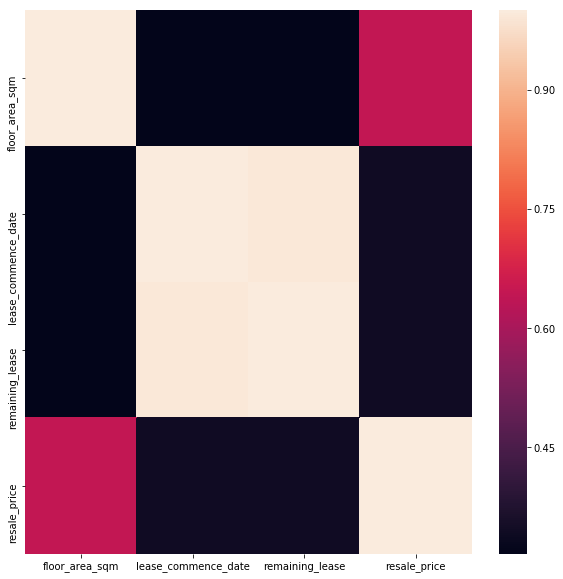

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
correlation_matrix = hdb_resale_prices_df.corr()
sns.heatmap(correlation_matrix)
plt.show()

What interesting observations have you identified so far?

## Applying Linear Regression
So, we have done a quick exploration of the data so far. Now let's prepare our dataset for our linear regression modelling!
Overall, here is what we are going to do step by step. (We'll only do some steps if we have enough time)

1. Separate our target variable from our dataset
    - Note: We will start very simple with a single feature and add more features as we go
2. Create a training and test set
3. Form a baseline model.
4. Standardize or normalize our data for continuous variables.
5. Transform categorical data to numerical values.
6. Pick and train our model -> Linear Regression for today
7. Test our model.
8. Repeat these steps until results are satisfactory

In [31]:
# Overview of columns
hdb_resale_prices_df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [34]:
numerical_features = ["floor_area_sqm"]
cardinal_features = ["month", "remaining_lease", "lease_commence_date"]
categorical_features = ["town", "flat_type", "storey_range", "flat_model"]
deleted_columns = ["block", "street_name"]
target_variable = ["resale_price"]
assert (len(numerical_features) + len(cardinal_features) + len(categorical_features) + 
        len(deleted_columns) + len(target_variable)) == len(hdb_resale_prices_df.columns) , "The total selected columns don't match all columns"

X = hdb_resale_prices_df[numerical_features]
y = hdb_resale_prices_df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123) # 30% is generally an okay size for a test set.

In [35]:
X_train.head()

,floor_area_sqm
37012,91.0
69019,110.0
10886,85.0
9023,124.0
47580,104.0


`Question`: Why do we split our train and test set before we start modeling ?

```
<YOUR_ANSWER_HERE>
```

### Baseline model

`Question`: Why do we first create a base line model? 

```
<YOUR_ANSWER_HERE>
```


Alright, let's form our baseline model. We are going to do this very simplistic. Let's take the `mean` of all our resale flats and use that as our predicted value. First we need to calculate the mean value and then create an array (of length `X_test`) that contains this value.

In [38]:
mean_value = y_train.mean() 
prediction_test = np.array([mean_value for i in range(len(X_test))])
prediction_train = np.array([mean_value for i in range(len(X_train))])
prediction_test

array([[439644.02668521],
       [439644.02668521],
       [439644.02668521],
       ...,
       [439644.02668521],
       [439644.02668521],
       [439644.02668521]])

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_test = mean_squared_error(y_test, prediction_test)
rmse_test = np.sqrt(mse_test)
mse_train = mean_squared_error(y_train, prediction_train)
rmse_train = np.sqrt(mse_train)
print("rmse for the test set is ", rmse_test)

rmse for the test set is  145972.95085474532


How can we interpret this result ? Can you think of a better baseline model ?

## Linear Regression
Here is how we apply the linear regression model on our data set

In [41]:
lr = LinearRegression(normalize=True, fit_intercept=False)
lr.fit(X_train, y_train)
predicted_lr = lr.predict(X_test)
mse_test = mean_squared_error(y_test, predicted_lr)
rmse_test = np.sqrt(mse_test)
print("rmse for the test set is ", rmse_test)

rmse for the test set is  113037.8825507663


Are we doing better ? How does our model look ?

In [43]:
print("Our coefficient for floor_area_sqm", lr.coef_, "our, intercept", lr.intercept_)

Our coefficient for floor_area_sqm [[4471.32392246]] our, intercept 0.0


In [44]:
def plot_predictions_vs_real(y_true, pred, **kwargs):
    if isinstance(y_true, pd.Series) or isinstance(y_true, pd.DataFrame):
        y_true = np.array(y_true.values)
    if isinstance(pred,  pd.Series) or isinstance(y_true, pd.DataFrame):
        pred = np.array(pred.values)
    
    y_true = y_true.reshape(len(y_true), )
    pred = pred.reshape(len(pred), )

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_xlabel("predicted value")
    ax.set_ylabel("True value")
    sns.regplot(pred, y_true, ax=ax, **kwargs)
    plt.show()

C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


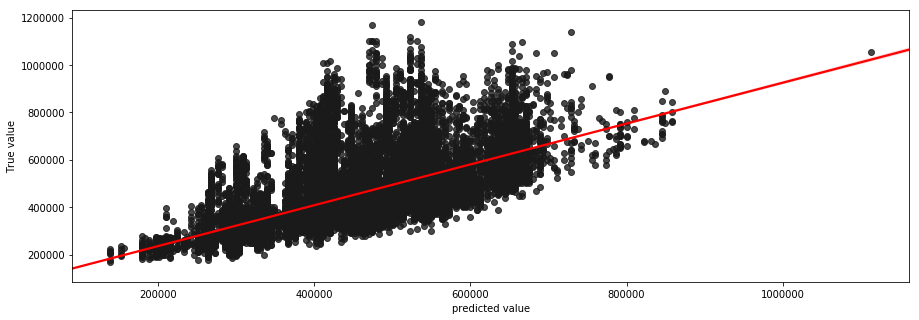

In [45]:
plot_predictions_vs_real(y_test, predicted_lr, line_kws={"color":"r"}, color=".1")

The graph above shows how accurate our model prediction is for the resale price vs the true price. The distance between the dot and the red line is how far off the model was for that particular data point. As we can see there are many outliers.

Alright, let's get down to business!

Try adding different features to see whether we can improve our model. Given the exporation above what is a good feature to start with ? Play around, by adding more features. Don't forget to inspect the performance of your results!  